In [53]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [54]:
pdir = 'images/lakha'
labels = []
for i in range(10):
    labels.append(40)

mdata = []
for i in os.listdir(pdir):
    im = cv2.imread(os.path.join(pdir, i), cv2.IMREAD_GRAYSCALE)
    mdata.append(im)

In [55]:
mdata = np.array(mdata)

In [56]:
data = np.load('test_dataset/images.npy')
target = np.load('test_dataset/target.npy')

In [57]:
target= np.append(target, np.array(labels))

In [58]:
data.shape

(400, 64, 64)

In [59]:
mdata.shape

(10, 64, 64)

In [60]:
d = np.vstack((data, mdata))
d.shape

(410, 64, 64)

In [61]:
data = d

In [62]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 410 images in the dataset
There are 41 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [63]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [64]:
def show_40_distinct_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=11, figsize=(18, 9))
    axarr=axarr.flatten()
    
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

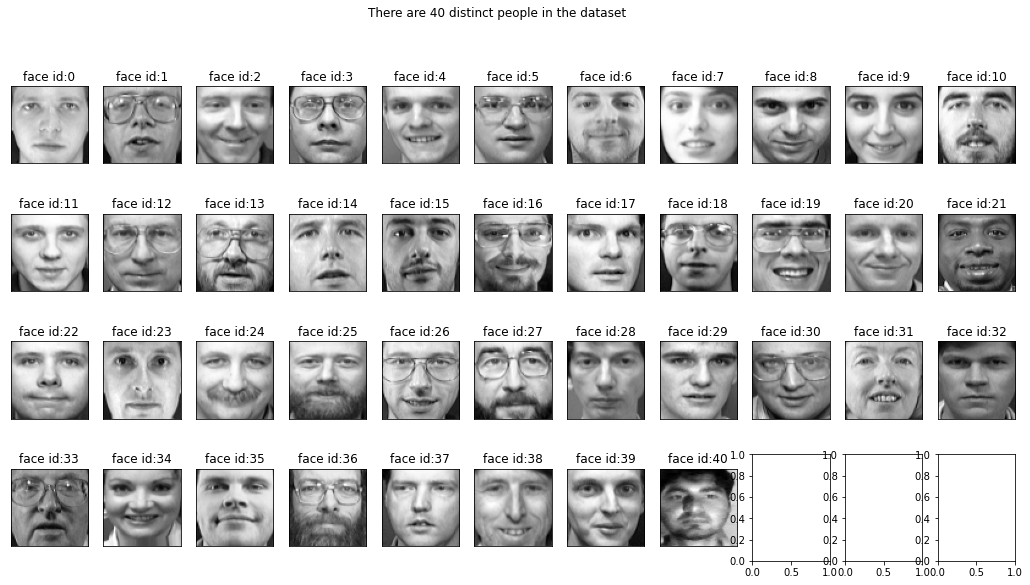

In [65]:
show_40_distinct_people(data, np.unique(target))

In [66]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

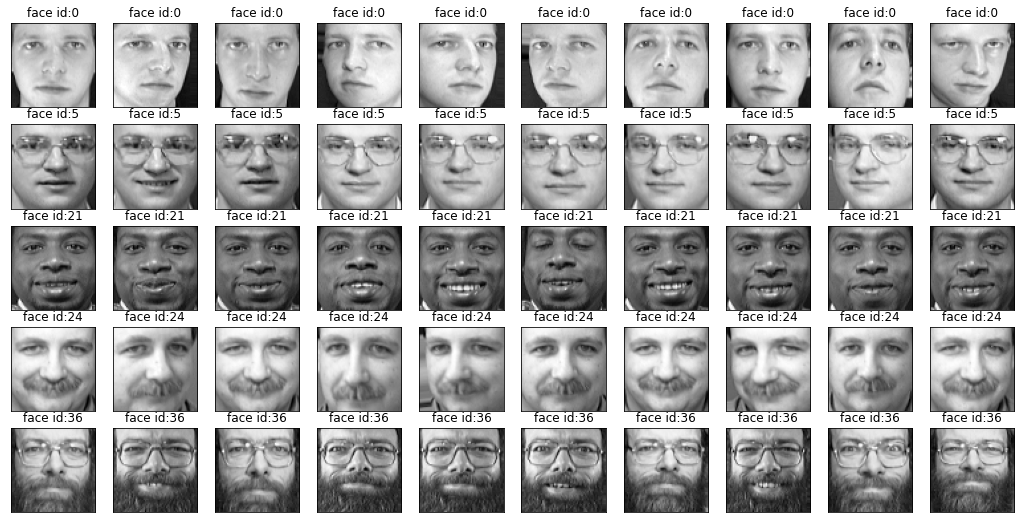

In [67]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [68]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (410, 4096)


In [69]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (287, 4096)
y_train shape:(287,)


In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

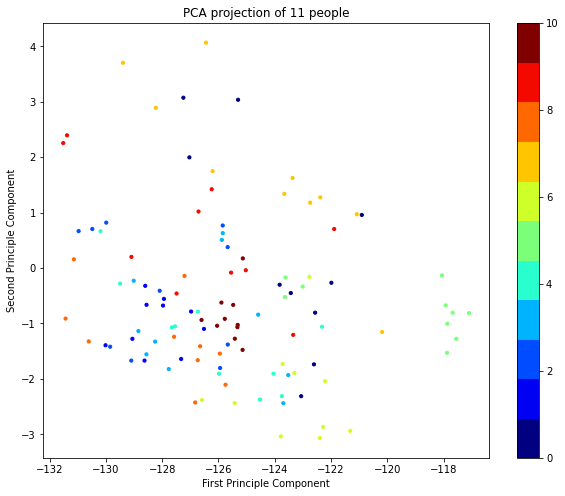

In [71]:
number_of_people=11
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

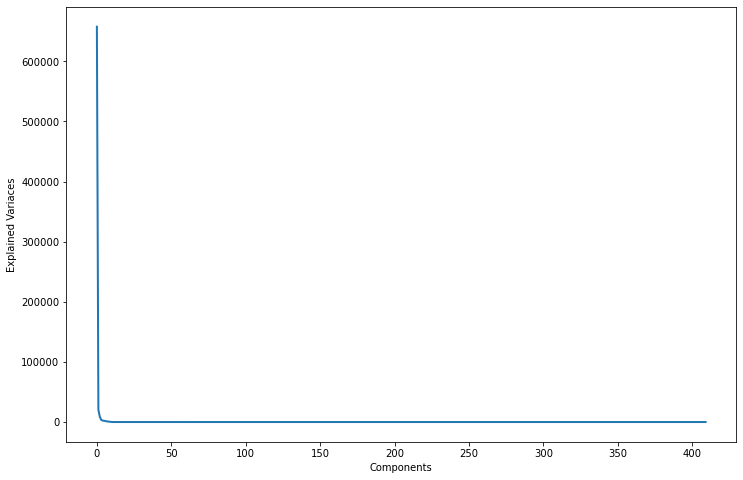

In [72]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [73]:
n_components=90

In [74]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

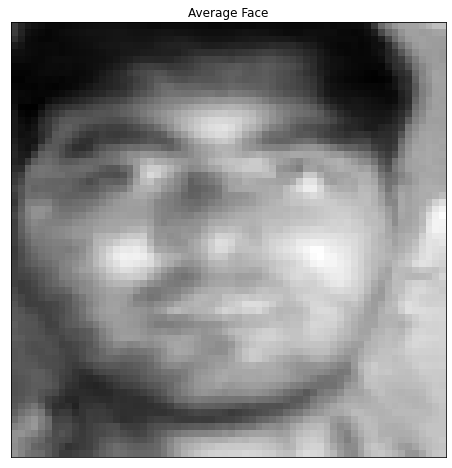

In [75]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

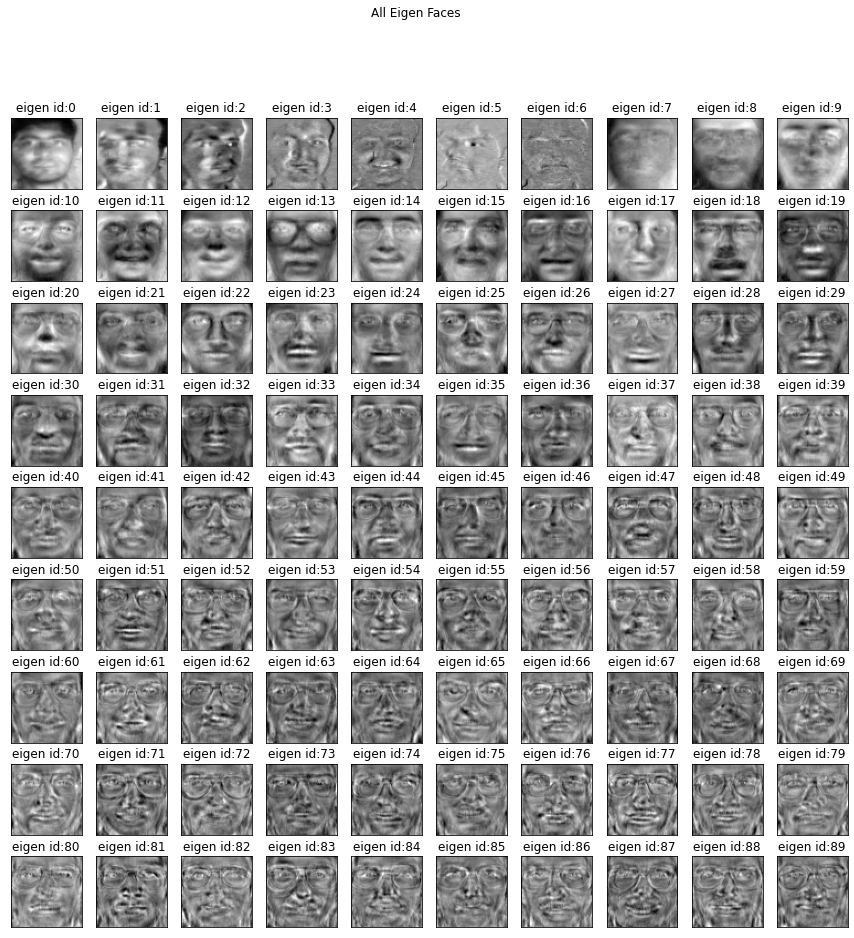

In [76]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [77]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [78]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.93

========== LR RESULT ==========
Accuracy score:0.89

========== NB RESULT ==========
Accuracy score:0.84

========== KNN RESULT ==========
Accuracy score:0.72

========== DT RESULT ==========
Accuracy score:0.60

========== SVM RESULT ==========
Accuracy score:0.92



In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.97
LR mean cross validations score:0.91
NB mean cross validations score:0.83
KNN mean cross validations score:0.68
DT mean cross validations score:0.49
SVM mean cross validations score:0.90


In [80]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.93


<AxesSubplot:>

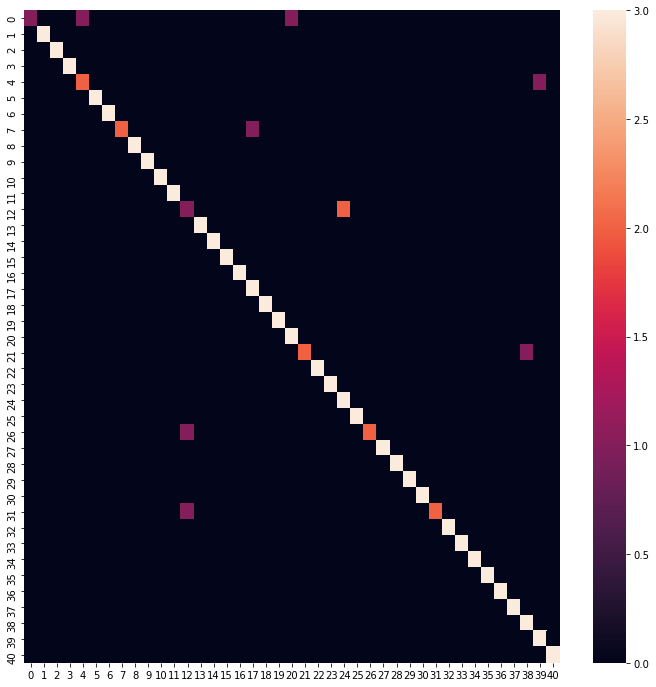

In [81]:
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [82]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.33      0.33      0.33         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

In [83]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LinearDiscriminantAnalysis Leave One Out cross-validation mean accuracy score:0.99


In [84]:
model=LinearDiscriminantAnalysis()
model.fit(X_train_pca, y_train)
y_pred=model.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.93


In [85]:
import joblib

In [86]:
filename = 'finalized_model.pkl'
joblib.dump(model, open(filename, 'wb'))

In [87]:
loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(X_test_pca, y_test)
print(result)

0.926829268292683


In [88]:
filename = 'finalized_pca.pkl'
joblib.dump(pca, open(filename, 'wb'))

In [91]:
loaded_pca = joblib.load(open(filename, 'rb'))
result = loaded_pca.explained_variance_
print(result)

[6.57687875e+05 2.06504941e+04 8.49519824e+03 3.38313428e+03
 2.34860400e+03 2.00152136e+03 1.38564185e+03 1.10840259e+03
 6.21998474e+02 4.24216736e+02 1.03807640e+01 6.64240694e+00
 3.89814854e+00 2.74253225e+00 2.45712805e+00 2.28311229e+00
 1.81479025e+00 1.47709620e+00 1.27326226e+00 1.17820477e+00
 1.07785630e+00 9.27211821e-01 8.68487597e-01 7.95139968e-01
 7.61313021e-01 6.98796153e-01 6.46410525e-01 5.90462029e-01
 5.46602488e-01 5.36760926e-01 4.63484794e-01 4.54483658e-01
 4.23982441e-01 4.18205380e-01 4.09474939e-01 3.87928694e-01
 3.65836114e-01 3.51792723e-01 3.24166954e-01 3.00256699e-01
 2.91234761e-01 2.75131524e-01 2.64623582e-01 2.49705106e-01
 2.42382988e-01 2.34772846e-01 2.24218026e-01 2.09953949e-01
 1.99722737e-01 1.95930555e-01 1.89368516e-01 1.86735272e-01
 1.77261293e-01 1.72423601e-01 1.66571259e-01 1.63297489e-01
 1.59924254e-01 1.55962035e-01 1.51240423e-01 1.46041796e-01
 1.41276240e-01 1.40627235e-01 1.39625460e-01 1.34126991e-01
 1.29007503e-01 1.280126